### 2023-05-23_01_Basic_Python_yandex-music_v1
### 2023-05-23
#


# Contents <a id='back'></a>

* [Introduction (Введение)](#intro)
* [Stage 1. Data overview (Обзор данных)](#data_review)
    * [Conclusions (Выводы)](#data_review_conclusions)
* [Stage 2. Data preprocessing (Предварительная обработка данных)](#data_preprocessing)
    * [2.1 Header style (Стиль заголовка)](#header_style)
    * [2.2 Missing values (Пропущенные значения)](#missing_values)
    * [2.3 Duplicates (Дубликаты)](#duplicates)
    * [2.4 Conclusions (Выводы)](#data_preprocessing_conclusions)
* [Stage 3. Testing the hypotheses (Проверка гипотез)](#hypotheses)
    * [3.1 Hypothesis 1: user activity in the two cities (активность пользователей в двух городах)](#activity)
    * [3.2 Hypothesis 2: music preferences on Monday and Friday (музыкальные предпочтения в понедельник и пятницу)](#week)
    * [3.3 Hypothesis 3: genre preferences in Springfield and Shelbyville (жанровые предпочтения в Спрингфилде и Шелбивилле)](#genre)
* [Findings](#end)

## Introduction (Введение) <a id='intro'></a>
Whenever we're doing research, we need to formulate hypotheses that we can then test. Sometimes we accept these hypotheses; other times, we reject them. To make the right decisions, a business must be able to understand whether or not it's making the right assumptions.

In this project, you'll compare the music preferences of the cities of Springfield and Shelbyville. You'll study real Yandex.Music data to test the hypotheses below and compare user behavior for these two cities.

----
Всякий раз, когда мы проводим исследование, нам нужно сформулировать гипотезы, которые мы затем можем проверить. Иногда мы принимаем эти гипотезы, в других случаях мы их отвергаем. Чтобы принимать правильные решения, бизнес должен быть в состоянии понять, делает ли он правильные предположения или нет.

В этом проекте вы сравните музыкальные предпочтения жителей городов Спрингфилд и Шелбивилль. Вы изучите реальные данные Яндекс.Музыки, чтобы проверить приведенные ниже гипотезы и сравнить поведение пользователей в этих двух городах.


### Goal (Цель): 
Test three hypotheses:
1. User activity differs depending on the day of the week and from city to city. 
2. On Monday mornings, Springfield and Shelbyville residents listen to different genres. This is also true for Friday evenings. 
3. Springfield and Shelbyville listeners have different preferences. In Springfield, they prefer pop, while Shelbyville has more rap fans.

------
Проверьте три гипотезы:
1. Активность пользователей отличается в зависимости от дня недели и от города к городу.
2. По утрам в понедельник жители Спрингфилда и Шелбивилля слушают музыку разных жанров. Это также верно для пятничных вечеров.
3. У слушателей Спрингфилда и Шелбивилля разные предпочтения. В Спрингфилде предпочитают поп-музыку, в то время как в Шелбивилле больше поклонников рэпа.

### Stages (Этапы)
Data on user behavior is stored in the file `/datasets/music_project_en.csv`. There is no information about the quality of the data, so you will need to explore it before testing the hypotheses. 

First, you'll evaluate the quality of the data and see whether its issues are significant. Then, during data preprocessing, you will try to account for the most critical problems.

------
Данные о поведении пользователя хранятся в файле `/datasets/music_project_en.csv`. Информации о качестве данных нет, поэтому вам нужно будет изучить их, прежде чем проверять гипотезы.

Во-первых, вы оцените качество данных и увидите, являются ли их проблемы существенными. Затем, во время предварительной обработки данных, вы попытаетесь учесть наиболее критические проблемы.
 
Your project will consist of three stages:
 1. Data overview
 2. Data preprocessing
 3. Testing the hypotheses
 
-----
Ваш проект будет состоять из трех этапов:
1. Обзор данных
2. Предварительная обработка данных
3. Проверка гипотез
 
[Back to Contents](#back)

## Stage 1. Data overview <a id='data_review'></a>

Open the data on Yandex.Music and explore it.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# importing pandas
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH_data = '../data_yandex-practicum-ds/'

In [4]:
%%time
# прочитать данные по адресу:
# df = pd.read_csv('https://code.s3.yandex.net/datasets/music_project_en.csv')
# прочитать алтернативные данные с компьютера, отличаются количеством строк и наличием порядкового столбца
# df = pd.read_csv(f'{PATH_data}yandex_music_project.csv')

# прочитать данные с компьютера
df = pd.read_csv(f'{PATH_data}music_project_en.csv')

CPU times: total: 93.8 ms
Wall time: 86 ms


In [5]:
# некоторая статистиика данных:
# count - количество не non-NA/null данных в каждом столбце
# unique - количество уникальных значений
# top - наиболее распространенное значение
# freq - Частота наиболее распространенного значения
df.describe()

,userID,Track,artist,genre,City,time,Day
count,65079,63736,57512,63881,65079,65079,65079
unique,41748,39666,37806,268,2,20392,3
top,A8AE9169,Brand,Kartvelli,pop,Springfield,08:14:07,Friday
freq,76,136,136,8850,45360,14,23149


In [6]:
#df.describe(include="all")

            userID	Track	artist	genre	City	time	Day
     count	65079	63736	57512	63881	65079	65079	65079
__1-проблема: количество значений в столбцах различно, присутсвуют non-NA/null значения от которых необходимо будет избавляться__

In [7]:
df['Day'].value_counts()

Day
Friday       23149
Monday       22697
Wednesday    19233
Name: count, dtype: int64

__2-проблема количество значений в поле `Day` всего три- `Friday`, `Monday`, `Wednesday` отсутсвуют другие дни недели__

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


The table contains seven columns. They all store the same data type: `object`.

According to the documentation:
- `'userID'` — user identifier
- `'Track'` — track title
- `'artist'` — artist's name
- `'genre'` - жанр
- `'City'` — user's city
- `'time'` — the exact time the track was played
- `'Day'` — day of the week

__3-проблема: Некоторые имена написаны в верхнем регистре, некоторые - в нижнем__
__4-проеблема: В некоторых именах есть пробелы__


In [9]:
# 5 первых строк - как пример данных
# df.head()
# 10 первых строк - как пример данных
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
5,842029A1,Chains,Obladaet,rusrap,Shelbyville,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Springfield,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Springfield,20:47:49,Wednesday
8,8FA1D3BE,L’estate,Julia Dalia,ruspop,Springfield,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Shelbyville,21:20:49,Wednesday


### Conclusions (Выводы)<a id='data_review_conclusions'></a> 

Each row in the table stores data on a track that was played. Some columns describe the track itself: its title, artist and genre. The rest convey information about the user: the city they come from, the time they played the track. 

The available data is sufficient to test hypotheses.     
We will perform preliminary data processing.

----
В каждой строке таблицы хранятся данные о дорожке, которая была воспроизведена. В некоторых колонках описывается сам трек: его название, исполнитель и жанр. Остальные передают информацию о пользователе: город, из которого он родом, время воспроизведения трека.

Имеющихся данных достаточно для проверки гипотез.    
Выполним предварительную обработку данных.

[Back to Contents](#back)

## Stage 2. Data preprocessing (Предварительная обработка данных ) <a id='data_preprocessing'></a>
* Remove the spaces in the column headers, align the case of characters
* Fix/delete/replace missing values
* Check for duplicates in the data

----
* Удалим пробелы в заголовках столбцов, выравним регистр символов
* Исправим/удалим/заменим пропущенные значения
* Проверим дубликаты в данных

### 2.1. Header style <a id='header_style'></a>
Remove the spaces in the column headers, align the case of characters <br> Удалим пробелы в заголовках столбцов, выравним регистр символов

In [10]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [11]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

In [12]:
df

,userid,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
...,...,...,...,...,...,...,...
65074,729CBB09,My Name,McLean,rnb,Springfield,13:32:28,Wednesday
65075,D08D4A55,Maybe One Day (feat. Black Spade),Blu & Exile,hip,Shelbyville,10:00:00,Monday
65076,C5E3A0D5,Jalopiina,NaN,industrial,Springfield,20:09:26,Friday
65077,321D0506,Freight Train,Chas McDevitt,rock,Springfield,21:43:59,Friday


### Missing values (Пропущенные значения) <a id='missing_values'></a>
Fix/delete/replace missing values <br> Исправим/удалим/заменим пропущенные значения

In [13]:
# Найдем количество пропущенных значений в таблице в каждом столбце:
# вариант 1
df.isnull().sum()

userid       0
track     1343
artist    7567
genre     1198
city         0
time         0
day          0
dtype: int64

In [14]:
# Найдем количество пропущенных значений в таблице в каждом столбце:
# вариант 2
df.isna().sum()

userid       0
track     1343
artist    7567
genre     1198
city         0
time         0
day          0
dtype: int64

In [15]:
# доля пропущенных значений от общего количества запсией
#df.isnull().sum()/len(df)
df.isna().sum()/len(df)

userid    0.000000
track     0.020636
artist    0.116274
genre     0.018408
city      0.000000
time      0.000000
day       0.000000
dtype: float64

Not all missing values affect the research. For instance, the missing values in `track` and `genre` are not critical. You can simply replace them with clear markers.

But missing values in the `performer` column may affect the comparison of musical preferences in Springfield and Shelbyville. In real life, it would be useful to find out the reasons why data is missing and try to make up for them. But I don't have that option. Thus:
* Fill in these missing values with markers
* Evaluate how much missing values can affect my calculations

-----
Не все пропущенные значения влияют на результаты исследования. Например, отсутствующие значения в `треке` и `жанр` не являются критичными. Вы можете просто заменить их прозрачными маркерами.

Но пропущенные значения в графе `исполнитель` могут повлиять на сравнение музыкальных предпочтений в Спрингфилде и Шелбивилле. В реальной жизни было бы полезно узнать причины, по которым данные отсутствуют, и попытаться их восполнить. Но у меня нет такой возможности. Таким образом:
* Заполните эти пропущенные значения маркерами
* Оценить, насколько сильно пропущенные значения могут повлиять на мои вычисления

Replace the missing values in `'track'`, `'artist'`, and `'genre'` with the string `'unknown'`. To do this, create the `columns_to_replace` list, loop over it with `for`, and replace the missing values in each of the columns:

-----
Заменим пропущенные значения в `'track'`, `'artist'`, и `'genre'` строкой `'unknown'`.     
Сделаем список `columns_to_replace`, и заменим недостающие значения в каждом из столбцов:

In [16]:
# looping over column names and replacing missing values with 'unknown'
# перебор имен столбцов и замена пропущенных значений на 'unknown'

columns_to_replace = df.loc[:, ['track', 'artist', 'genre']]
                            
for column in columns_to_replace:
    #df[column] = columns_to_replace[column].fillna('unknown')
    df[column].replace(np.nan, 'unknown', inplace = True)
    
columns_to_replace

,track,artist,genre
0,Kamigata To Boots,The Mass Missile,rock
1,Delayed Because of Accident,Andreas Rönnberg,rock
2,Funiculì funiculà,Mario Lanza,pop
3,Dragons in the Sunset,Fire + Ice,folk
4,Soul People,Space Echo,dance
...,...,...,...
65074,My Name,McLean,rnb
65075,Maybe One Day (feat. Black Spade),Blu & Exile,hip
65076,Jalopiina,NaN,industrial
65077,Freight Train,Chas McDevitt,rock


In [17]:
df[['track', 'artist', 'genre']]

,track,artist,genre
0,Kamigata To Boots,The Mass Missile,rock
1,Delayed Because of Accident,Andreas Rönnberg,rock
2,Funiculì funiculà,Mario Lanza,pop
3,Dragons in the Sunset,Fire + Ice,folk
4,Soul People,Space Echo,dance
...,...,...,...
65074,My Name,McLean,rnb
65075,Maybe One Day (feat. Black Spade),Blu & Exile,hip
65076,Jalopiina,unknown,industrial
65077,Freight Train,Chas McDevitt,rock


In [18]:
# проверим количество пропущенных значений в таблице в каждом столбце:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  65079 non-null  object
 1   track   65079 non-null  object
 2   artist  65079 non-null  object
 3   genre   65079 non-null  object
 4   city    65079 non-null  object
 5   time    65079 non-null  object
 6   day     65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


In [19]:
df.describe()

,userid,track,artist,genre,city,time,day
count,65079,65079,65079,65079,65079,65079,65079
unique,41748,39667,37807,269,2,20392,3
top,A8AE9169,unknown,unknown,pop,Springfield,08:14:07,Friday
freq,76,1343,7567,8850,45360,14,23149


### 2.3. Duplicates (Дубликаты) <a id='duplicates'></a>
Check for duplicates in the data (Проверим дубликаты в данных)    

In [20]:
df.duplicated().sum()

3826

In [21]:
# removing obvious duplicates
# удаление очевидных дубликатов
df = df.drop_duplicates()
df.reset_index(drop=True)

,userid,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
...,...,...,...,...,...,...,...
61248,729CBB09,My Name,McLean,rnb,Springfield,13:32:28,Wednesday
61249,D08D4A55,Maybe One Day (feat. Black Spade),Blu & Exile,hip,Shelbyville,10:00:00,Monday
61250,C5E3A0D5,Jalopiina,unknown,industrial,Springfield,20:09:26,Friday
61251,321D0506,Freight Train,Chas McDevitt,rock,Springfield,21:43:59,Friday


Count obvious duplicates once more to make sure you have removed all of them <br> Подсчитайте очевидные дубликаты еще раз, чтобы убедиться, что вы удалили их все:

In [22]:
df.duplicated().sum()

0

Now get rid of implicit duplicates in the `genre` column. For example, the name of a genre can be written in different ways. Such errors will also affect the result. <br> Теперь избавьтесь от неявных дубликатов в столбце `genre`. Например, название жанра может быть написано по-разному. Такие ошибки также повлияют на результат.

In [23]:
# Print a list of unique genre names, sorted in alphabetical order
# Распечатайте список уникальных названий жанров, отсортированных в алфавитном порядке

df.sort_values('genre', ascending=True)
df['genre'].unique()
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'ambient', 'americana', 'animated', 'anime',
       'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook',
       'avantgarde', 'axé', 'baile', 'balkan', 'beats', 'bigroom',
       'black', 'bluegrass', 'blues', 'bollywood', 'bossa', 'brazilian',
       'breakbeat', 'breaks', 'broadway', 'cantautori', 'cantopop',
       'canzone', 'caribbean', 'caucasian', 'celtic', 'chamber',
       'children', 'chill', 'chinese', 'choral', 'christian', 'christmas',
       'classical', 'classicmetal', 'club', 'colombian', 'comedy',
       'conjazz', 'contemporary', 'country', 'cuban', 'dance',
       'dancehall', 'dancepop', 'dark', 'death', 'deep', 'deutschrock',
       'deutschspr', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat',
       'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy',
       'electronic', 'electropop', 'emo', 'entehno', 'epicmetal',
       'estrada', 'ethnic', 'eurofo

Look through the list to find implicit duplicates of the genre `hiphop`. These could be names written incorrectly or alternative names of the same genre.

You will see the following implicit duplicates:
* `hip`
* `hop`
* `hip-hop`

To get rid of them, declare the function `replace_wrong_genres()` with two parameters: 
* `wrong_genres=` — the list of duplicates
* `correct_genre=` — the string with the correct value

The function should correct the names in the `'genre'` column from the `df` table, i.e. replace each value from the `wrong_genres` list with the value in `correct_genre`.

---
Просмотрите список, чтобы найти неявные дубликаты жанра "хип-хоп`. Это могут быть имена, написанные неправильно, или альтернативные названия того же жанра.

Вы увидите следующие неявные дубликаты:
* `hip`
* `hop`
* `hip-hop`

Чтобы избавиться от них, объявите функцию `replace_wrong_genres()` с двумя параметрами:
* `wrong_genres=` — список дубликатов
* `correct_genre=` — строка с правильным значением

Функция должна исправить названия в столбце `genre` из таблицы `df`, т.е. заменить каждое значение из списка `wrong_genres` значением в `correct_genre`.


In [24]:
# function for replacing implicit duplicates
# функция для замены неявных дубликатов
def replace_wrong_genres(wrong_genres, correct_genre):
    for wrong_genre in wrong_genres:
        df['genre'] = df['genre'].replace(wrong_genre, correct_genre)
        
duplicates = ['hip', 'hop', 'hip-hop']
genre = 'hiphop'
replace_wrong_genres(duplicates, genre)

df

,userid,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
...,...,...,...,...,...,...,...
65074,729CBB09,My Name,McLean,rnb,Springfield,13:32:28,Wednesday
65075,D08D4A55,Maybe One Day (feat. Black Spade),Blu & Exile,hiphop,Shelbyville,10:00:00,Monday
65076,C5E3A0D5,Jalopiina,unknown,industrial,Springfield,20:09:26,Friday
65077,321D0506,Freight Train,Chas McDevitt,rock,Springfield,21:43:59,Friday


In [25]:
# removing implicit duplicates
# удаление неявных дубликатов
df = df.drop_duplicates()
df

,userid,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
...,...,...,...,...,...,...,...
65074,729CBB09,My Name,McLean,rnb,Springfield,13:32:28,Wednesday
65075,D08D4A55,Maybe One Day (feat. Black Spade),Blu & Exile,hiphop,Shelbyville,10:00:00,Monday
65076,C5E3A0D5,Jalopiina,unknown,industrial,Springfield,20:09:26,Friday
65077,321D0506,Freight Train,Chas McDevitt,rock,Springfield,21:43:59,Friday


In [26]:
# checking for implicit duplicates
# проверка на наличие неявных дубликатов
df.duplicated().sum()

0

[Back to Contents](#back)

### 2.4. Conclusions (Выводы) <a id='data_preprocessing_conclusions'></a>
We detected three issues with the data:

- Incorrect header styles
- Missing values
- Obvious and implicit duplicates

The headers have been cleaned up to make processing the table simpler.

All missing values have been replaced with `'unknown'`. But we still have to see whether the missing values in `'genre'` will affect our calculations.

The absence of duplicates will make the results more precise and easier to understand.

Now we can move on to testing hypotheses. 

---
Мы обнаружили три проблемы с данными:

- Неправильные стили заголовков
- Пропущенные значения
- Очевидные и неявные дубликаты

Заголовки были очищены, чтобы упростить обработку таблицы.

Все пропущенные значения были заменены на `неизвестно". Но нам все еще нужно посмотреть, повлияют ли пропущенные значения в поле `жанр" на наши расчеты.

Отсутствие дубликатов сделает результаты более точными и понятными.

Теперь мы можем перейти к проверке гипотез.

## Stage 3. Testing hypotheses (Проверка гипотез)) <a id='hypotheses'></a>
    * [3.1 Hypothesis 1: user activity in the two cities (активность пользователей в двух городах)](#activity)
    * [3.2 Hypothesis 2: music preferences on Monday and Friday (музыкальные предпочтения в понедельник и пятницу)](#week)
    * [3.3 Hypothesis 3: genre preferences in Springfield and Shelbyville (жанровые предпочтения в Спрингфилде и Шелбивилле)]
### 3.1. Hypothesis 1: comparing user behavior in two cities (активность пользователей в двух городах) <a id='activity'></a>

According to the first hypothesis, __users from Springfield and Shelbyville listen to music differently__. Test this using the data on three days of the week: Monday, Wednesday, and Friday. <br> Согласно первой гипотезе, __пользователи из Спрингфилда и Шелбивилля слушают музыку по-разному__. Проверьте это, используя данные за три дня недели: понедельник, среду и пятницу.

* Divide the users into groups by city.
* Compare how many tracks each group played on Monday, Wednesday, and Friday.
* Разделите пользователей на группы по городам.
* Сравните, сколько треков каждая группа сыграла в понедельник, среду и пятницу.

For the sake of practice, perform each computation separately.    
Evaluate user activity in each city. Group the data by city and find the number of songs played in each group.     
Для практики выполняйте каждое вычисление отдельно.     
Оцените активность пользователей в каждом городе. Сгруппируйте данные по городам и найдите количество песен, сыгранных в каждой группе.

In [27]:
# Counting up the tracks played in each city
# Подсчет треков, сыгранных в каждом городе

print(df.groupby('city')['track'].count())

city
Shelbyville    18512
Springfield    42741
Name: track, dtype: int64


__Springfield__ has more tracks played than __Shelbyville__. But that does not imply that citizens of Springfield listen to music more often. This city is simply bigger, and there are more users.      
В __Спрингфилде__ сыграно больше треков, чем в __Шелбивилле__. Но это не означает, что жители Спрингфилда чаще слушают музыку. Этот город просто больше, и в нем больше пользователей.

In [28]:
# Calculating tracks played on each of the three days- Monday, Wednesday, and Friday
# Подсчет треков, сыгранных в каждый из трех дней- понедельник, среду и пятницу

print(df.groupby('day')['track'].count())

day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64


Wednesday is the quietest day overall. But if we consider the two cities separately, we might come to a different conclusion.     
Среда - самый тихий день в целом. Но если мы рассмотрим эти два города по отдельности, то можем прийти к другому выводу.

In [29]:
def number_tracks(day, city):
    """
    функция для вычисления количества песен, сыгранных за данный день (day) и город (city). 
    параметры:
        day - день недели
        city - название города
    """
    track_list = df[df['day']==day]
    track_list = track_list[track_list['city']==city]
    track_list_count = track_list['userid'].count()
    
    return track_list_count

In [30]:
# Вызовем number_tracks() шесть раз, изменяя значения параметров, 
# чтобы получить данные по обоим городам за каждый из трех дней.

nt = pd.DataFrame({}, columns=['city', 'Monday', 'Wednesday', 'Friday'])        

for index, city in enumerate(['Springfield', 'Shelbyville']):
    nt.at[index, 'city'] = city
    for day in ['Monday', 'Wednesday', 'Friday']:
        nt.at[index, day] = number_tracks(day, city)
        
nt

,city,Monday,Wednesday,Friday
0,Springfield,15740,11056,15945
1,Shelbyville,5614,7003,5895


__Conclusions (Выводы)__

The data reveals differences in user behavior <br> Данные выявляют различия в поведении пользователей:

- In Springfield, the number of songs played peaks on Mondays and Fridays, while on Wednesday there is a decrease in activity. <br> В Спрингфилде количество исполняемых песен достигает максимума по понедельникам и пятницам, в то время как в среду наблюдается снижение активности.
- In Shelbyville, on the contrary, users listen to music more on Wednesday. User activity on Monday and Friday is smaller. <br> В Шелбивилле, напротив, пользователи больше слушают музыку в среду. Активность пользователей в понедельник и пятницу меньше.

So the first hypothesis seems to be correct. <br> Итак, первая гипотеза, по-видимому, верна.

[Back to Contents](#back)

### Hypothesis 2: music at the beginning and end of the week (музыкальные предпочтения в понедельник и пятницу)<a id='week'></a>

According to the second hypothesis, __on Monday morning and Friday night, citizens of Springfield listen to genres that differ from ones users from Shelbyville enjoy__. <br> Согласно второй гипотезе, __утром в понедельник и вечером в пятницу жители Спрингфилда слушают жанры, которые отличаются от тех, что нравятся пользователям из Шелбивилля__.

In [77]:
# утром в понедельник - 'Monday','07:00','11:00'
# вечером в пятницу   - 'Friday','17:00','23:00'
monday_morning = df[(df['city']=='Shelbyville') & (df['day']=='Monday') & (df['time']>'07:00') & (df['time']<'11:00')]
friday_evening = df[(df['city']=='Shelbyville') & (df['day']=='Friday') & (df['time']>'17:00') & (df['time']<'23:00')]

two_day = pd.concat([monday_morning, friday_evening])
#genre_shelbyville = two_day.groupby(['genre', 'city'], as_index=False)['genre'].count()
#genre_shelbyville = two_day.groupby(['genre', 'city'])['genre'].count().reset_index(name='Shelbyville')
genre_shelbyville = two_day.groupby(['genre'])['genre'].count().reset_index(name='Shelbyville')

genre_shelbyville

,genre,Shelbyville
0,acoustic,1
1,adult,2
2,alternative,121
3,ambient,12
4,americana,1
...,...,...
137,variété,7
138,videogame,4
139,vocal,4
140,western,12


In [78]:
# утром в понедельник - 'Monday','07:00','11:00'
# вечером в пятницу   - 'Friday','17:00','23:00'
monday_morning = df[(df['city']=='Springfield') & (df['day']=='Monday') & (df['time']>'07:00') & (df['time']<'11:00')]
friday_evening = df[(df['city']=='Springfield') & (df['day']=='Friday') & (df['time']>'17:00') & (df['time']<'23:00')]

two_day = pd.concat([monday_morning, friday_evening])
#genre_shelbyville = two_day.groupby(['genre', 'city'], as_index=False)['genre'].count()
#genre_shelbyville = two_day.groupby(['genre', 'city'])['genre'].count().reset_index(name='Shelbyville')
genre_springfield = two_day.groupby(['genre'])['genre'].count().reset_index(name='Springfield')

genre_springfield

,genre,Springfield
0,adult,2
1,africa,3
2,alternative,327
3,ambient,40
4,americana,3
...,...,...
173,videogame,12
174,vocal,17
175,western,14
176,world,389


In [85]:
# объеденим две таблицы:
genre_two = pd.concat([
    genre_shelbyville.set_index('genre'),
    genre_springfield.set_index('genre')], axis=1, join='outer').reset_index()

genre_two

,genre,Shelbyville,Springfield
0,acoustic,1.0,NaN
1,adult,2.0,2.0
2,alternative,121.0,327.0
3,ambient,12.0,40.0
4,americana,1.0,3.0
...,...,...,...
188,taraftar,NaN,1.0
189,tradjazz,NaN,1.0
190,türk,NaN,2.0
191,türkçe,NaN,6.0


In [86]:
# заменим пустые значения (NaN) на нули
genre_two['Shelbyville'].replace(np.nan, 0, inplace = True)
genre_two['Springfield'].replace(np.nan, 0, inplace = True)

# изменим тип столбцов с количествои треков на целый:
genre_two = genre_two.astype({'Shelbyville': np.int32,
                              'Springfield': np.int32
                             })

# отсортируем
genre_two.sort_values(by=['Shelbyville'], ascending=False, inplace=True, ignore_index=True)
# переиндексируем
# сбросим индекс, используя reset_index, чтобы вернуть индекс по умолчанию 0, 1, 2,..., n-1 
# и используем drop=True чтобы указать удалить существующий индекс
genre_tree = genre_two.reset_index(drop=True)

genre_tree

,genre,Shelbyville,Springfield
0,pop,474,1494
1,dance,392,1044
2,rock,378,991
3,electronic,363,962
4,hiphop,177,559
...,...,...,...
188,flamenco,0,3
189,folklore,0,1
190,folktronica,0,1
191,gangsta,0,2


In [87]:
# сократим количество данных, убрав строки с нулевыми данными у Shelbyville

genre_tree = genre_tree[genre_tree['Shelbyville']!=0]
genre_tree

,genre,Shelbyville,Springfield
0,pop,474,1494
1,dance,392,1044
2,rock,378,991
3,electronic,363,962
4,hiphop,177,559
...,...,...,...
137,minimal,1,9
138,jewish,1,7
139,indian,1,4
140,gothic,1,2


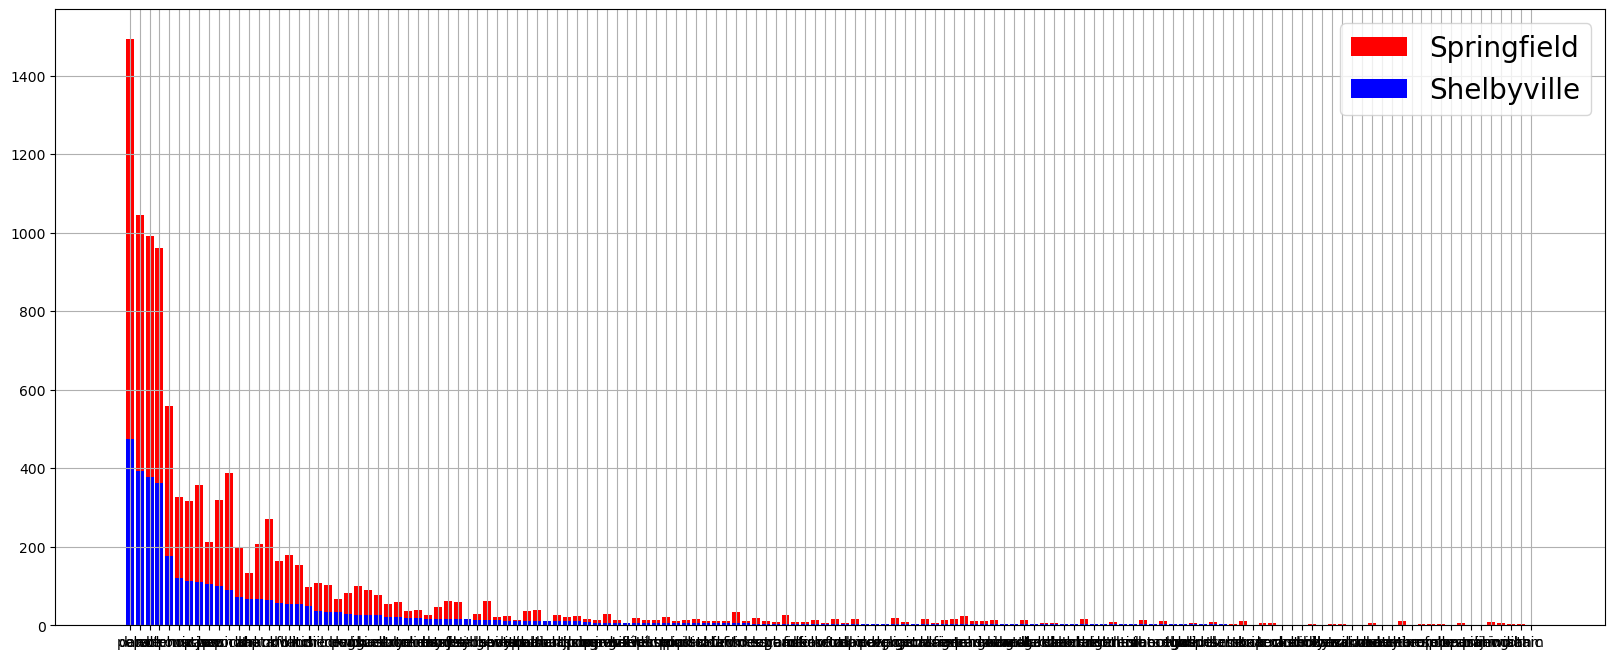

In [88]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))

ax1.bar(genre_tree['genre'], genre_tree['Springfield'], color='red', label='Springfield')
ax1.bar(genre_tree['genre'], genre_tree['Shelbyville'], color='blue', label='Shelbyville')
ax1.legend(fontsize=20)
ax1.grid(True)

Если по графикам, то Shelbyville слушает практически те же жанры что и Springfield, только в меньшем количестве, возможно из-за количечества пользователей или количество проживающих жителей в этих городах.    

Изменим вид графика, увеличим размер области

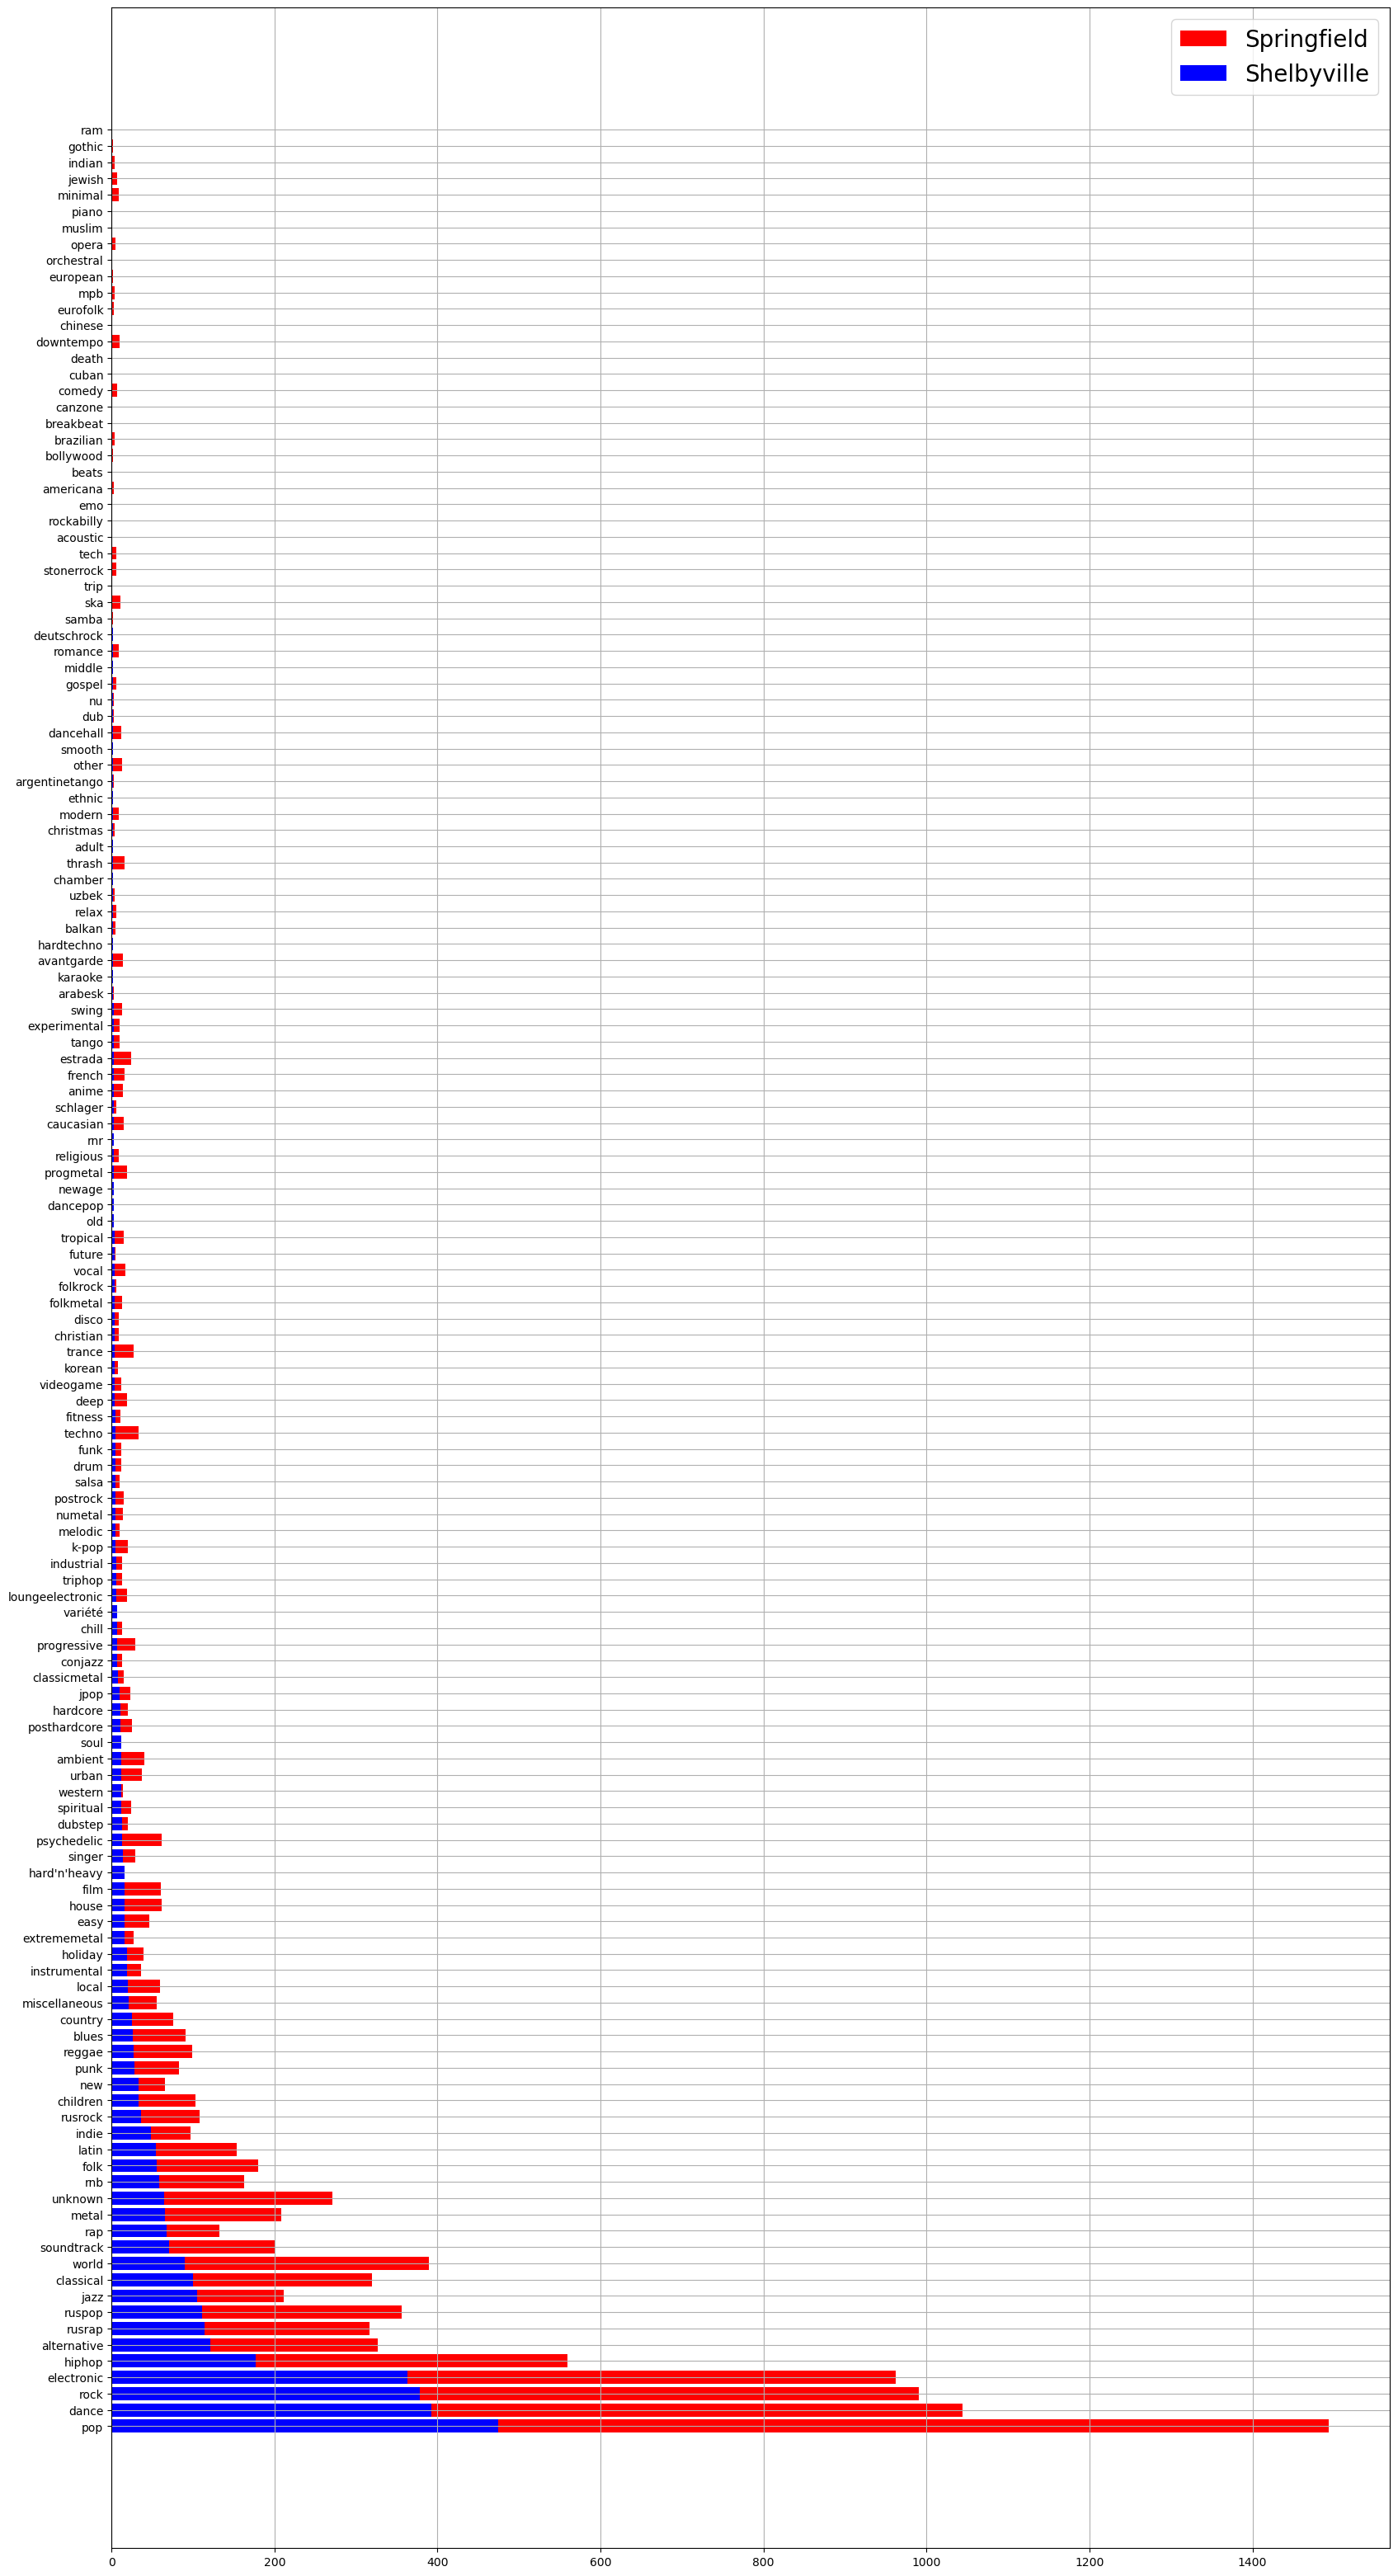

In [89]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 40))

ax1.barh(genre_tree['genre'], genre_tree['Springfield'], color='red', label='Springfield')
ax1.barh(genre_tree['genre'], genre_tree['Shelbyville'], color='blue', label='Shelbyville')
ax1.legend(fontsize=20)
ax1.grid(True)

__Выводы__

Основываясь на визуальном сравнении двух графиков, можно сказать что пользователи Springfield и Shelbyville слушают одинаковую по жанрам музыку, но перечень жанров пользователей Springfield больше, так количество записей пользователей больше:

    city           количество записей
    Shelbyville    18512
    Springfield    42741

сравнение было бы правильным если количество данных от Springfield и Shelbyville было бы одинаковым.

Таким образом, вторая гипотеза с искажением подтвердилась: Пользователи слушают похожую музыку в начале и конце недели.

### Hypothesis 3: genre preferences in Springfield and Shelbyville (жанровые предпочтения в Спрингфилде и Шелбивилле) <a id='genre'></a>

__Hypothesis: Shelbyville loves rap music. Springfield's citizens are more into pop.__     
__Гипотеза: Шелбивилль любит рэп-музыку. Жители Спрингфилда больше любят попсу.__


In [102]:
shelbyville = df[(df['city']=='Shelbyville')]
springfield = df[(df['city']=='Springfield')]

df_shelbyville = shelbyville.groupby(['genre'])['genre'].count().reset_index(name='Shelbyville')
df_springfield = springfield.groupby(['genre'])['genre'].count().reset_index(name='Springfield')

# объеденим две таблицы:
df_two = pd.concat([
    df_shelbyville.set_index('genre'),
    df_springfield.set_index('genre')], axis=1, join='outer').reset_index()

# заменим пустые значения (NaN) на нули
df_two['Shelbyville'].replace(np.nan, 0, inplace = True)
df_two['Springfield'].replace(np.nan, 0, inplace = True)

# изменим тип столбцов с количествои треков на целый:
df_two = df_two.astype({'Shelbyville': np.int32,
                        'Springfield': np.int32
                       })

# отсортируем
df_two.sort_values(by=['Shelbyville'], ascending=False, inplace=True, ignore_index=True)
# переиндексируем
# сбросим индекс, используя reset_index, чтобы вернуть индекс по умолчанию 0, 1, 2,..., n-1 
# и используем drop=True чтобы указать удалить существующий индекс
df_tree = df_two.reset_index(drop=True)

df_tree[df_tree['genre'].isin(['pop', 'hiphop'])]

,genre,Shelbyville,Springfield
0,pop,2431,5892
4,hiphop,960,2096


__Выводы__
Третья гипотеза - неверна.   
пользователи Shelbyville и Springfield's больше любят попсу.

[Back to Contents](#back)

## Выводы

# изменить !!!!

Вы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных. 
С методами проверок гипотез вы ещё познакомитесь в следующих темах.